## PCA 차원 축소

### iris 데이터 로드

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# iris 데이터 로드
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# iris.data(numpy 배열 형태)를 데이터프레임으로 변환

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # 컬럼명 list

irisDF = pd.DataFrame(iris.data, columns=columns) # irisDF에 데이터프레임 저장
irisDF

# iris.feature_names에는 공백, 단위 등 불필요한 요소들이 포함되어 있으므로,
# 원하는 형태의 컬럼명을 따로 지정

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# target 컬럼 생성: iris.target(레이블)
irisDF['target'] = iris.target
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 데이터 산포도 시각화: sepal_length, sepal_width

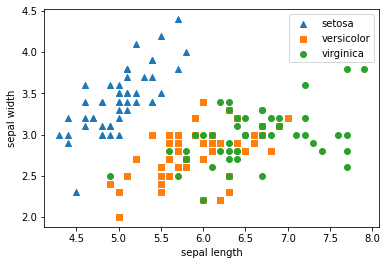

In [6]:
# 데이터 모양: 세모(setosa), 네모(versicolor), 동그라미(virginica)
markers = ['^', 's', 'o']

# iris 데이터의 target 값: setosa 0, versicolor 1, virginica 2
# markers의 인덱스(0, 1, 2)를 그대로 target 추출에 사용
for i, marker in enumerate(markers): # enumerate: 리스트를 iter로 받을 경우 인덱스까지 반환
    x_axis_data = irisDF.loc[irisDF['target'] == i, 'sepal_length']
    y_axis_data = irisDF.loc[irisDF['target'] == i, 'sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# setosa(0)는 분류가 잘 되어있고, versicolor(1)와 virginica(2)는 다소 섞여있는 모습

### 표준화: 원본 데이터를 평균이 0, 분산이 1인 정규 분포로 변환
- PCA 수행을 위한 feature 표준화 작업

In [7]:
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
iris_scaled = StandardScaler()

# iris.data 표준화 수행(target 제외, feature 표준화)
iris_scaled = iris_scaled.fit_transform(iris.data)

In [8]:
# 표준화된 데이터(iris_scaled)의 크기
iris_scaled.shape

(150, 4)

### PCA 변환 수행

In [9]:
from sklearn.decomposition import PCA

# PCA 객체 생성(n_components=2) -> 현재 4개인 차원의 수를 2개로 축소
pca = PCA(n_components=2)

# PCA 변환
iris_pca = pca.fit_transform(iris_scaled)

In [10]:
# PCA 변환된 데이터(iris_pca)의 크기
iris_pca.shape

# 열(feature)의 개수가 2개로 축소

(150, 2)

In [14]:
iris_pca[:5]
# ndarray 형태이므로 리스트에 사용되는 메소드 적용
# head()는 데이터프레임을 다루는 메소드

# 알고리즘 내부에서 계산을 통해 변환된 해석 불가능한 2차원 결과값

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [16]:
# PCA 변환된 데이터의 컬럼명
pca_columns = ['pca_comp_1', 'pca_comp_2']

# 변환된 데이터를 데이터프레임(irisDF_pca)에 저장
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)

# target 컬럼 생성
irisDF_pca['target'] = iris.target

In [17]:
irisDF_pca

,pca_comp_1,pca_comp_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


### PCA 차원 축소된 데이터 산포도 시각화: pca_comp_1, pca_comp_2

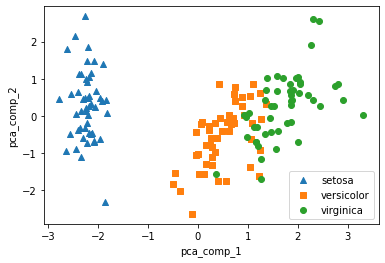

In [18]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca.loc[irisDF['target'] == i, 'pca_comp_1'] # x축: PCA component 1
    y_axis_data = irisDF_pca.loc[irisDF['target'] == i, 'pca_comp_2'] # y축: PCA component 2
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_comp_1')
plt.ylabel('pca_comp_2')
plt.show()

# versicolor(1)와 virginica(2)의 분류가 개선된 모습

### PCA Component 별 변동성 비율

In [27]:
# 변동성 비율(explained_variance_ratio_)

# 각 컬럼이 전체 데이터의 변동성에 대해 어느 정도의 설명력을 가지는지 확인
print(pca.explained_variance_ratio_)

# 두 개의 차원으로 설명 가능한 변동성 비율
pca.explained_variance_ratio_.sum()

# comp_1 약 73%, comp_2 약 23% 설명
# 차원을 두 개로 축소했지만 여전히 전체 변동성의 약 96% 설명 가능(원본에서 4~5% 정도 소실)

[0.72962445 0.22850762]


0.9581320720000164

### 예측 성능 비교
- 원본 데이터 기반 학습과 PCA 변환 데이터 기반 학습의 분류 예측 성능 비교

In [20]:
# 랜덤 포레스트 분류 모델 사용
# 데이터의 크기가 크지 않으므로 교차 검증 수행

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [21]:
# 원본 데이터

# 모델 객체 생성
rcf = RandomForestClassifier(random_state=156)

# 교차 검증 수행
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)

print('교차 검증 개별 정확도:', scores)
print('교차 검증 평균 정확도:', np.mean(scores))

교차 검증 개별 정확도: [0.98 0.94 0.96]
교차 검증 평균 정확도: 0.96


In [22]:
# PCA 변환 데이터

# irisDF_pca의 feature 추출
pca_X = irisDF_pca[['pca_comp_1', 'pca_comp_2']]

# 교차 검증 수행(x=pca_X, y=iris.target)
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)

print('교차 검증 개별 정확도:', scores_pca)
print('교차 검증 평균 정확도:', np.mean(scores_pca))

# 성능이 8% 감소했지만, 4개의 특성을 2개로 50% 축소한 것을 감안하면
# PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있다고 판단

교차 검증 개별 정확도: [0.88 0.88 0.88]
교차 검증 평균 정확도: 0.88


## 과일 이미지 데이터 분류 및 PCA 실습

In [24]:
import numpy as np

# npy 파일 형식 로드: np.load()
fruits = np.load('fruits_300.npy')

print(fruits.shape) # 이미지는 3차원 데이터: 행(샘플 수), 폭, 높이
fruits[:3] # numpy array 형식의 이미지 정보 파일

(300, 100, 100)


array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]], dtype=uint8)

In [25]:
##### 2차원 변환 #####

# 2차원 데이터로 변환해야 transform 함수 사용 가능
# (300 X 100 X 100)의 3차원 데이터에서 뒤의 두 개의 축을 하나의 차원으로 병합
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [29]:
# 이미지 정보 데이터를 이미지로 출력

import matplotlib.pyplot as plt


# draw_fruits() -> 3차원 데이터를 인자로 받는 이미지 출력 함수

def draw_fruits(arr, ratio=1): # default: ratio=1
    
    n = len(arr) # 샘플 개수
    
    rows = int(np.ceil(n/10)) # 한 줄에 10개의 이미지를 출력 -> 행의 개수: n/10 (ceil: 올림 함수)
    cols = n if rows < 2 else 10 # 열의 개수: 행이 1개인 경우 n, 나머지는 10
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio)) 

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # 이미지를 n개까지만 출력
                axes[i,j].imshow(arr[i*10 + j], cmap='gray_r') # imshow(): 이미지 출력
            axes[i,j].axis('off') # axis 출력되지 않도록 설정
    plt.show()

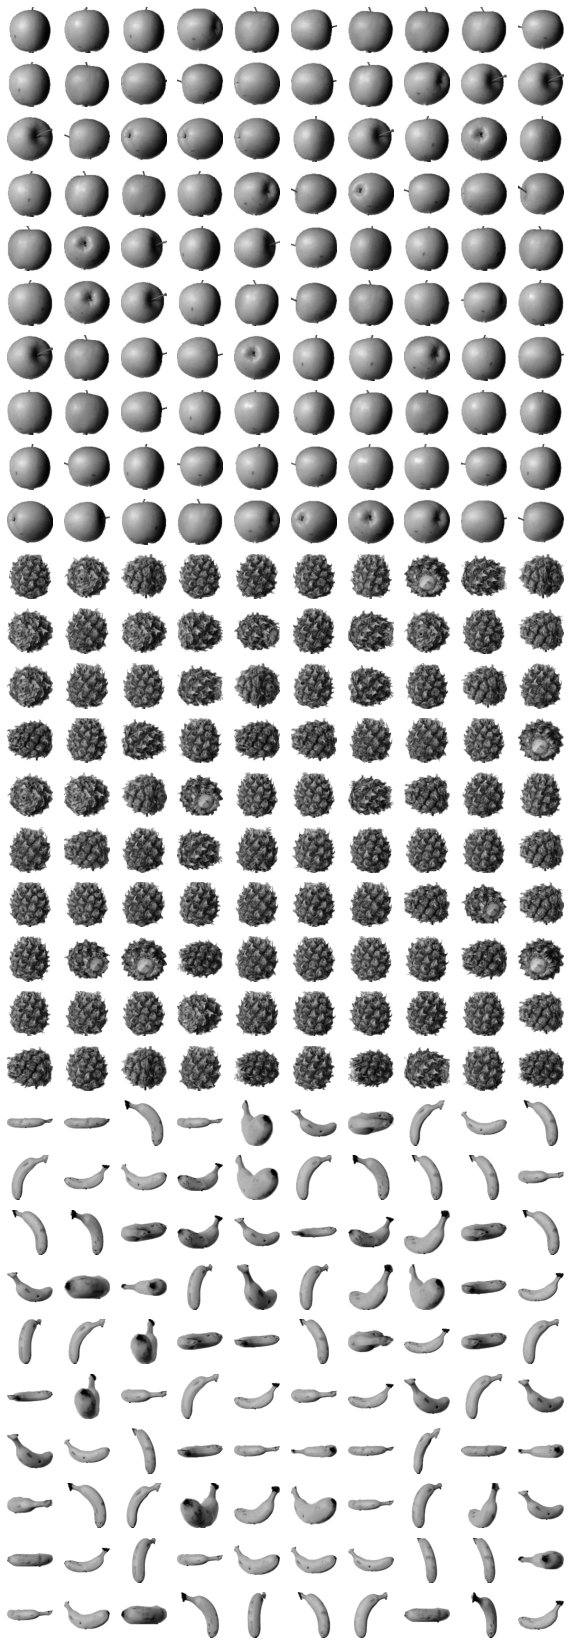

In [32]:
# 과일 이미지 출력 -> 3차원 데이터(fruits) 사용
draw_fruits(fruits)
# draw_fruits(fruits_2d.reshape(-1, 100, 100))

In [33]:
# PCA 변환(차원 축소)

from sklearn.decomposition import PCA

# PCA 객체 생성(주성분 50개) -> 10,000개의 feature 50개로 축소
pca = PCA(n_components=50)

# PCA 변환 수행 -> transform 함수에는 2차원 데이터(fruits_2d) 사용
fruits_pca = pca.fit_transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [34]:
# 각 주성분의 변동성 비율(분산 설명력)
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480345,
       0.00447835, 0.00437318, 0.00408035, 0.00389477, 0.00372444,
       0.00359283, 0.0033147 , 0.00317794, 0.00304318, 0.00303684,
       0.00288917, 0.00275873, 0.00264634, 0.00255682, 0.00252173,
       0.00247148, 0.00239346, 0.00230705, 0.0022169 , 0.00216756,
       0.00212931, 0.00195707, 0.00192699, 0.00188532, 0.00184528,
       0.00183046, 0.0017351 , 0.00168501, 0.0016146 , 0.00160016])

In [36]:
# 50개의 주성분으로 설명 가능한 변동성 비율
pca.explained_variance_ratio_.sum()

# 전체 변동성의 약 92% 설명 가능

0.9215153356198426

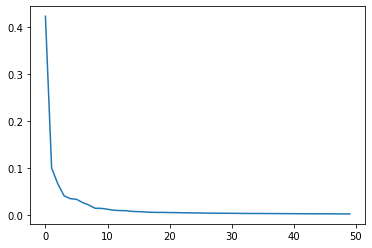

In [37]:
# 변동성 비율 시각화
plt.plot(pca.explained_variance_ratio_)
plt.show()

# x축은 feature(주성분/차원) 개수, y축은 설명력
# 10개 미만의 차원으로도 대부분의 데이터를 충분히 설명 가능

### 원본 데이터의 재구성

In [38]:
# PCA 변환 데이터를 원본으로 되돌리기(feature: 50 -> 10,000)
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

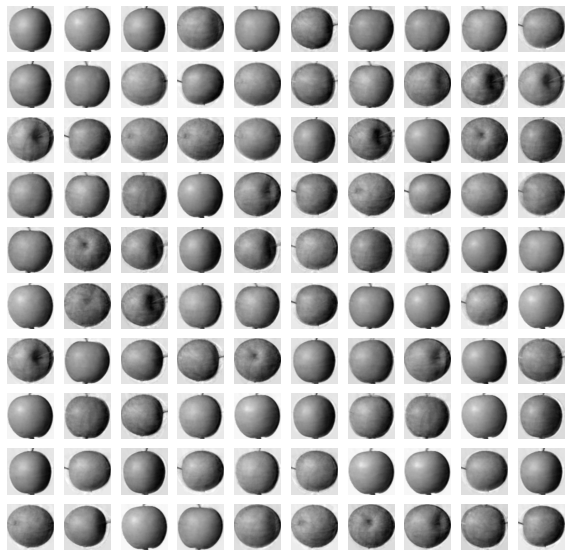

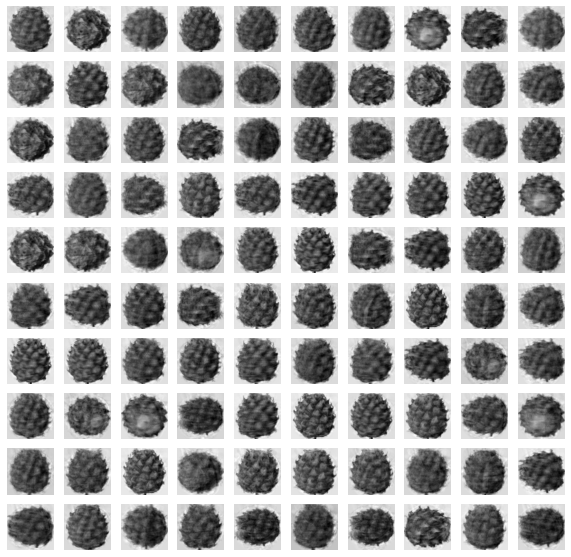

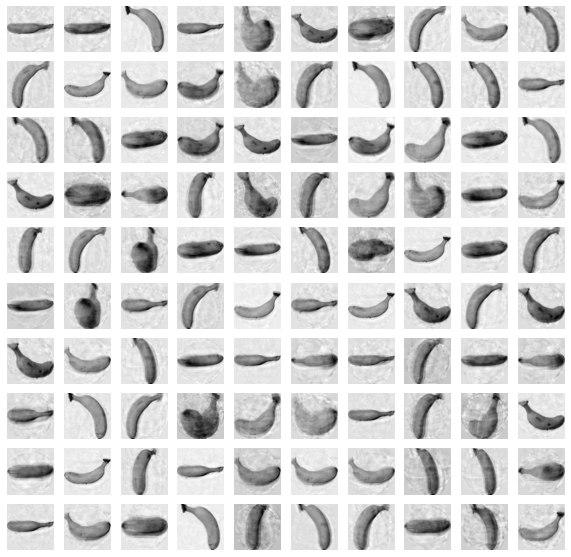

In [40]:
# 과일 이미지를 100개씩 나누어 출력

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100) # 3차원 변환

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print()

# 사과, 파인애플, 바나나가 100개씩 순서대로 들어있는 데이터

### Logistic Regression 분류 수행

In [41]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 객체 생성
lr = LogisticRegression()

In [42]:
# target 데이터 생성(numpy array 형태)
# 사과 0, 파인애플 1, 바나나 2로 지정 -> 0, 1, 2를 100개씩 생성
target = np.array([0]*100 + [1]*100 + [2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 교차 검증: cross_validate
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
- cross_val_score + fit/score time: 교차 검증 score와 소요 시간을 모두 반환

In [43]:
from sklearn.model_selection import cross_validate

# 데이터의 양이 많기 때문에 소요시간을 함께 반환하는 cross_validate 사용
score = cross_validate(lr, fruits_2d, target) # default: 5 fold
score

{'fit_time': array([0.43836641, 0.40145278, 0.6692071 , 0.47944617, 0.56684494]),
 'score_time': array([0.00199366, 0.00299263, 0.00299239, 0.00295806, 0.00299191]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [44]:
# 5 fold 교차 검증의 평균 반환
print(np.mean(score['test_score']))
print(np.mean(score['fit_time']))

0.9966666666666667
0.5110634803771973


In [45]:
# PCA 변환 데이터 교차 검증
pca_score = cross_validate(lr, fruits_pca, target)

print(np.mean(pca_score['test_score']))
print(np.mean(pca_score['fit_time']))

# score 향상, 소요시간 감소

1.0
0.030037546157836915


## 신용카드 데이터 세트 PCA 실습
- 데이터 정보: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

### 데이터 로드 및 컬럼명 변경

In [48]:
import pandas as pd

df = pd.read_excel('pca_credit_card.xls', sheet_name='Data', header=1)

print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [49]:
# 컬럼명 조회
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [50]:
# 컬럼명 변경
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [51]:
# target 지정(default)
y_target = df['default']

# feature 지정 -> ID, default(target) 삭제
x_features = df.drop(['ID', 'default'], axis=1)

In [52]:
y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [53]:
x_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

### Feature 상관관계 히트맵 시각화

<AxesSubplot:>

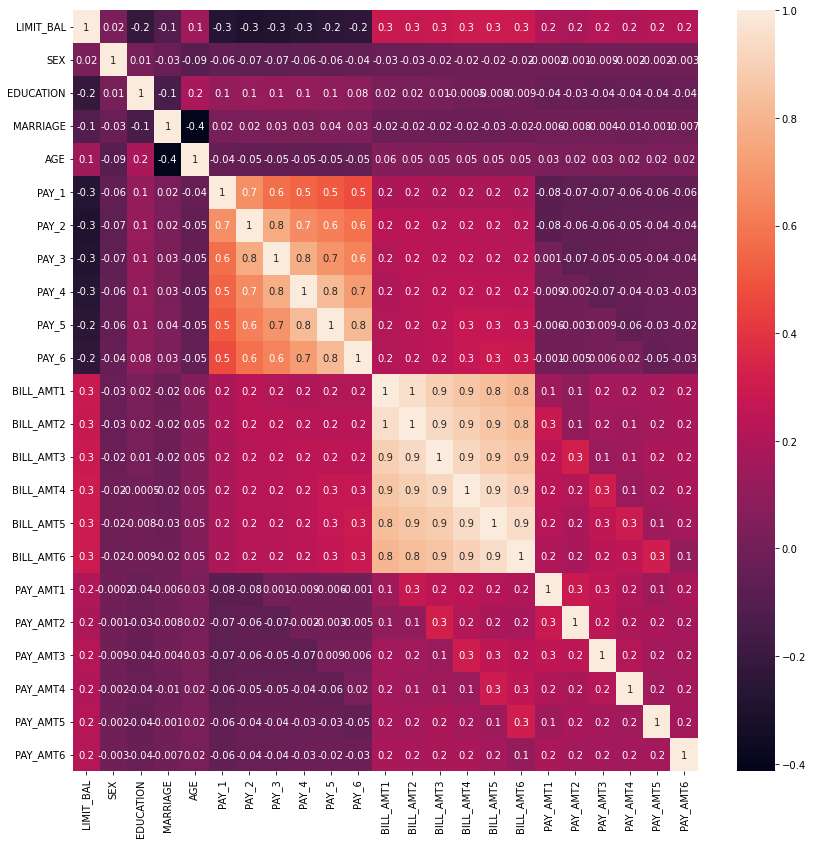

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
sns.heatmap(x_features.corr(), annot=True, fmt='.1g')

### PCA 변환 수행
- 상관도가 높은 feature PCA 변환 후 변동성 확인

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [56]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [58]:
# 대상 feature(속성) 리스트 생성
cols_bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [59]:
# PCA 변환 수행을 위한 feature 표준화 작업
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(x_features[cols_bill]) # 대상 feature 추출하여 표준화

# PCA 객체 생성(주성분 2개)
pca = PCA(n_components=2)
pca.fit_transform(df_cols_scaled)

array([[-1.61114812,  0.01247912],
       [-1.54759523, -0.06234401],
       [-1.03587378,  0.01125622],
       ...,
       [-1.19551872, -0.3595072 ],
       [-0.00829343, -0.04995798],
       [-0.25828552,  0.26525237]])

In [60]:
# component 별 변동성 비율
pca.explained_variance_ratio_

array([0.90555253, 0.0509867 ])

### 예측 성능 비교

In [61]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [72]:
# 원본 데이터

# 모델 객체 생성
rcf = RandomForestClassifier(n_estimators=300, random_state=156)

# 교차 검증 수행
scores = cross_val_score(rcf, x_features, y_target, scoring='accuracy', cv=3)

print('개별 정확도:', scores)
print('평균 정확도:', round(np.mean(scores), 4))

개별 정확도: [0.8083 0.8196 0.8232]
평균 정확도: 0.817


In [73]:
# PCA 변환 데이터: 주성분 6개

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_features)

# PCA 변환 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

# 교차 검증 수행
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('PCA 개별 정확도:', scores_pca)
print(f'PCA 평균 정확도: {np.mean(scores_pca):.4f}')

PCA 개별 정확도: [0.7907 0.7978 0.8021]
PCA 평균 정확도: 0.7969
